# Day 13 In-Class Assignment: Ordinary Differential Equations II

### <p style="text-align: right;"> &#9989; Cesarine Graham.</p>


#### <p style="text-align: right;"> &#9989; Shaan Karim, Kinza Hasan, Allison Perez-Bermudez.</p>


## Goals of this assignment

The goals of this assignment are:

* Solve a higher-order ODE: nonlinear pendulum
* Calculate the ground-state energy of a particle in an infinite square well


## Assignment instructions

Upload the assignment to Gradescope before noon on the day of the class.

-----------
## Part 1:  Revisit Pre-Class Example: Nonlinear Pendulum

Let's first revisit the nonlinear pendulum example we looked at in the pre-class notebook.

Consider a pendulum with an arm of length $l$ holding a bob of mass $m$ as shown in the figure below:

 https://mathematicalgarden.files.wordpress.com/2009/03/pendulum-definition1.png?w=300&h=229

In terms of the angle $\theta$ of displacement of the arm from the vertical, the acceleration of the mass is

$$l \frac{d^2 \theta}{dt^2}$$

in the tangential direction.
Meanwhile the force on the mass is vertically downward with magnitude $mg$ where $g=9.98 \text{ ms}^{-2}$ is the acceleration due to gravity.
For simplicity, we are ignoring friction and assuming the arm to be massless.

The component of this force in the tangential direction is $mg\sin(\theta)$, always toward the rest point at $\theta=0$, so Newton's second law gives us an equation of motion for the pendulum of the form

$$ m l \frac{d^2 \theta}{dt^2} = -mg \sin(\theta) $$

or equivalently

$$ \frac{d^2 \theta}{dt^2} = -\frac{g}{l} \sin(\theta) $$
  
Because it is nonlinear, it is not easy to solve this equation analytically, and no exact solution is known.
On the other hand, a numerical solution on the computer is straightforward.

We first use the trick to transform the second-order equation into two first-order equations by defining a new variable

$$ \frac{d \theta}{dt} = \omega $$

and

$$ \frac{d\omega}{dt} = -\frac{g}{l} \sin(\theta). $$

Now, we combine the two variables $\theta$ and $\omega$ into a single vector $\mathbf{r} = (\theta,\omega)$ and apply the 4th-order Runge-Kutta method in its vector form to solve two equations simultaneously.
In the end, we are only interested in the solution for $\theta$.

### 1.1 Update the $\mathbf{f}$ function
The steps toward solving the equations are similar to the example shown in the previous in-class notebook, but first we need to redefine the  $\mathbf{f}$ functions.
Please add line-by-line comments to the code below.

In [ ]:
# add comments to every line of the code below
import numpy as np

l = 0.1   # length of the pendulum [m]
g = 9.81  # gravitational acceleration [m/s/s]
def f(r, t):
    theta = r[0] # angle of the pendulum
    omega = r[1] # angular velocity of the pendulum
    dtheta_dt = omega # \frac{d\theta}{dt}, rate of change of angle
    domega_dt = -(g/l)*np.sin(theta) # \frac{d\omega}{dt}, rate of change of angular velocity
    return np.array([dtheta_dt, domega_dt], float) # returning the derivatives

### 1.2 Solve the equations

Now, write code below to solve the two first-order equations using the fourth-order Runge--Kutta method.

_Hint: You can find an example of how to solve multi-variable first-order equations in a previous in-class notebook. You can copy-paste and reuse most of that code._

Use your program to calculate the displacement angle $\theta$ for several periods of the pendulum, when it is released from a standstill at $\theta=179^\circ$ from the vertical.  
  
Make a graph of $\theta$ as a function of time.

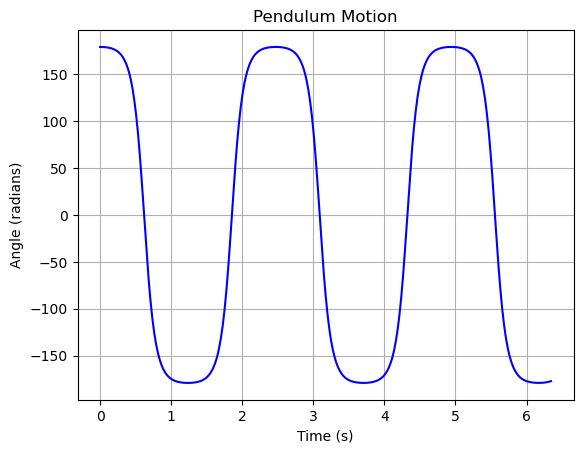

In [15]:
### your code here
import numpy as np
import matplotlib.pyplot as plt

# initial condiitons
l = 0.1  # arm length [m]
g = 9.81  # acceleration [m/s^2]

# time parameters
T = 2 * np.pi * np.sqrt(l / g)  # period of the pendulum
a = 0.0  # starting time
b = 10 * T  # ending time

# function to calculate derivatives
def f(r, t):
    theta = r[0]
    omega = r[1]
    dtheta_dt = omega
    domega_dt = -(g / l) * np.sin(theta)
    return np.array([dtheta_dt, domega_dt], float)

# using the Runge-Kutta method
def runge_kutta(h, N):
    tpoints = np.arange(a, b, h)
    xpoints = []
    ypoints = []
    r = np.array([np.radians(179), 0], float)
    for t in tpoints:
        xpoints.append(r[0])
        k1 = h * f(r, t)
        k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
        k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
        k4 = h * f(r + k3, t + h)
        r += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return tpoints, xpoints

# number of steps
N = 500
h = (b - a) / N

# calculating the results
tpoints, xpoints = runge_kutta(h, N)

#plotting the results
plt.plot(tpoints, np.degrees(xpoints), color='b')
plt.xlabel('Time (s)')
plt.ylabel('Angle (radians)')
plt.title('Pendulum Motion')
plt.grid()
plt.show()

-----------
## Part 2:  Calculate the Ground-State Energy of a Particle in an Infinite Square Well

For a single particle of mass $m$ in one dimension, the time-independent Schrödinger equation is

$$ -\frac{\hbar^2}{2m} \frac{d^2 \psi}{d x^2} + V(x) \psi(x) = E \psi(x), $$

where $\psi(x)$ is the wavefunction,  $V(x)$ is the potential energy at position $x$, and $E$ is the total energy of the particle (potential plus kinetic).

Consider the problem of a particle in a square potential well with infinitely high walls. This is

$$\begin{align}
V(x) = 0 &\text{ for } x<0<L \\
V(x) = \infty &\text{ elsewhere.}
\end{align}$$

This problem is solvable analytically, but it is instructive to see how we would solve it numerically as well.

### 2.1 Rewrite the equation
The first step to attempt in solving this problem is to rewrite the second-order differential equation into
into two simultaneous first-order equations.
Complete the equation in the Markdown cell below.

<font size=+3>&#9998;</font>
$$ \phi =\frac{ d\psi }{dx}$$
$$ \frac{ d\phi }{dx} = -\frac{2m}{\hbar^2}E\psi $$

### 2.2 Solve the eigenvalues using secant method
We are going to use secant method to find the ground-state energy for the system.
First, let's set it up.
There is no probability of finding the particle in the region where $V(x) = \infty$, so the wavefunction has to go to zero at $x\le 0$ and $x \ge L$.
But what about the boundary condition for $\phi =\frac{ d\psi }{dx}$?
Let's first set it to 1.0 at $x=0$.

In [21]:
# fill in the missing code

import numpy as np

# Constants
m = 9.1094e-31     # Electron mass [kg]
hbar = 1.0546e-34  # Planck constant reduced [J s]
e = 1.6022e-19     # Electron charge [C]
L = 5.2918e-11     # Bohr radius [m]
N = 1000
h = L/N

# Potential function
def V(x):
    return 0.0

def f(r,x,E):
    psi = r[0]
    phi = r[1]
    fpsi = phi
    fphi = (-2*m/hbar**2)*E*psi
    return np.array([fpsi,fphi],float)

# Calculate the wavefunction for a particular energy
def solve(E):
    psi = 0.0
    phi = 1.0
    r = np.array([psi,phi],float)

    for x in np.arange(0,L,h):
        k1 = h * f(r, x, E)
        k2 = h * f(r + 0.5 * k1, x + 0.5 * h, E)
        k3 = h * f(r + 0.5 * k2, x + 0.5 * h, E)
        k4 = h * f(r + k3, x + h, E)
        r += (k1+2*k2+2*k3+k4)/6

    return r[0]

# Main program to find the energy using the secant method
# See https://www.youtube.com/watch?v=Zz8AYQ8c5-U
E1 = 0
E2 = e/100
target = e/1000
psi2 = solve(E1)
while abs(E1-E2) > target:
    psi1 = psi2
    psi2 = solve(E2)
    E1, E2 = E2, E2-psi2*(E2-E1)/(psi2-psi1)

print("E =", E2/e, "eV")

E = 134.28637169286853 eV


### 2.3 Dependence of the energy eigenvalue on the initial value of $\frac{ d\psi }{dx}$
Once you get the code running and reproduce the same results are your groupmate, try changing the initial value of $\phi$ to different values (e.g. $-1$, $10$, $0$).
Record your observations on how the ground-state energy changes in the Markdown cell below.
Do you get the correct the ground-state energy with different initial values? Why?

In [25]:
# test your code here

# Constants
m = 9.1094e-31     # Electron mass [kg]
hbar = 1.0546e-34  # Planck constant reduced [J s]
e = 1.6022e-19     # Electron charge [C]
L = 5.2918e-11     # Bohr radius [m]
N = 1000
h = L/N

# Potential function
def V(x):
    return 0.0

def f(r,x,E):
    psi = r[0]
    phi = r[1]
    fpsi = phi
    fphi = (-2*m/hbar**2)*E*psi
    return np.array([fpsi,fphi],float)

# Calculate the wavefunction for a particular energy
def solve(E):
    psi = 0.0
    phi = 10.0
    r = np.array([psi,phi],float)

    for x in np.arange(0,L,h):
        k1 = h * f(r, x, E)
        k2 = h * f(r + 0.5 * k1, x + 0.5 * h, E)
        k3 = h * f(r + 0.5 * k2, x + 0.5 * h, E)
        k4 = h * f(r + k3, x + h, E)
        r += (k1+2*k2+2*k3+k4)/6

    return r[0]

# Main program to find the energy using the secant method
# See https://www.youtube.com/watch?v=Zz8AYQ8c5-U
E1 = 0
E2 = e/100
target = e/1000
psi2 = solve(E1)
while abs(E1-E2) > target:
    psi1 = psi2
    psi2 = solve(E2)
    E1, E2 = E2, E2-psi2*(E2-E1)/(psi2-psi1)

print("E =", E2/e, "eV")

E = 134.28637169286864 eV


<font color='blue'>
Changing the value of $\phi$ does not effect the value of $E$, except when $\phi=0$. When $\phi=0$, the $E$ returns a nan value (negative energy).

### 2.4 Initial energy guesses
How does the initial energy input impact the ground-state?
Can you set `E2` to zero or some negative number?
How about something several orders of magnitude larger?
In the Markdown cell below, write what parameters you try and whether the new the ground-state energy you obtain from the code is correct or not? Why?

In [32]:
# test your code here

# Constants
m = 9.1094e-31     # Electron mass [kg]
hbar = 1.0546e-34  # Planck constant reduced [J s]
e = 1.6022e-19     # Electron charge [C]
L = 5.2918e-11     # Bohr radius [m]
N = 1000
h = L/N

# Potential function
def V(x):
    return 0.0

def f(r,x,E):
    psi = r[0]
    phi = r[1]
    fpsi = phi
    fphi = (-2*m/hbar**2)*E*psi
    return np.array([fpsi,fphi],float)

# Calculate the wavefunction for a particular energy
def solve(E):
    psi = 0.0
    phi = 1.0
    r = np.array([psi,phi],float)

    for x in np.arange(0,L,h):
        k1 = h * f(r, x, E)
        k2 = h * f(r + 0.5 * k1, x + 0.5 * h, E)
        k3 = h * f(r + 0.5 * k2, x + 0.5 * h, E)
        k4 = h * f(r + k3, x + h, E)
        r += (k1+2*k2+2*k3+k4)/6

    return r[0]

# Main program to find the energy using the secant method
# See https://www.youtube.com/watch?v=Zz8AYQ8c5-U
E1 = 0
E2 = -e/100
target = e/1000
psi2 = solve(E1)
while abs(E1-E2) > target:
    psi1 = psi2
    psi2 = solve(E2)
    E1, E2 = E2, E2-psi2*(E2-E1)/(psi2-psi1)

print("E =", E2/e, "eV")

E = 134.2863716928512 eV


<font color='blue'>
Changing the value of $E_2$ does effect the value of E. When $E_2 = 0$, $E=0$. When $E_2$ is negative, $E$ is postive, in fact there is a disctinct relationship: $E$ gets smaller at the same order of magntitude as $E_2$. Also, if you make $E_2$ very small, after a certain point, $E$ becomes negative. 


### 2.5 Solving the eigenvalue using matrix method
In Homework 2, you learned how to approximate the second derivative of $\psi(x)$, $\frac{d^2 \psi}{d x^2}$,
as

$$ -\frac{\psi_{i+1}+\psi_{i-1}-2\psi_i}{h^2}, $$

where $h$ is the step length or spacing $h=1/(n+1)$, where $n$ is the number of data points.

You can rewrite this equation,

$$ -\frac{\hbar^2}{2m} \frac{d^2 \psi }{d x^2} + V(x) \psi (x) = E \psi (x),$$

as a linear set of equations of a form using similar functions you wrote in Homework 2.
Then, use `eigvals` from NumPy's `linalg` package to solve for the eigenvalues and compare with the solutions obtained earlier.

In [ ]:
# your code here